# *<center>Data Science - Computer Assignment 6</center>*

### *<center> Marzie Hariri - Armita Bahroudi - FatemeZahra Broumandnia </center>*
### *<center> 810199404-810100591-810100094 </center>*

### Imports

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA

## Task

### 1. Preprocessing

Load dataset

In [246]:
data = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [248]:
data.shape

(101766, 50)

In [249]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [250]:
data = data.replace("?",np.nan)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [251]:
data.isnull().sum() 

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [252]:
missing_percentage = data.isnull().sum() * 100 / len(data)

# Display the result
print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

#### Highest missing values are in weight, payer_code and medical_specialty
  - weight ~97% 
  - payer_code ~40%
  - medical_specialty 50%
  - max_glu_serum 95%
  - A1Cresult 83%

but Na values in last 2 features are meaningfull, so we keep them
#### Dropping these columns


In [253]:
data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)

check for any duplicate record: zero 

In [254]:
len(data)-len(data.drop_duplicates())

0

In [255]:
'Number of patients in dataset is {:,}'.format(data['patient_nbr'].nunique())


'Number of patients in dataset is 71,518'

In [256]:
'Number of records in dataset is {:,}'.format(len(data))

'Number of records in dataset is 101,766'

#### Analysing the unique values in Categorical values

In [257]:
cat_var = ["race", "gender", "age","metformin","repaglinide","nateglinide","chlorpropamide","glimepiride","acetohexamide","glipizide","glyburide","tolbutamide","pioglitazone","rosiglitazone","acarbose","miglitol","troglitazone","tolazamide","examide","citoglipton","insulin","glyburide-metformin","glipizide-metformin","glimepiride-pioglitazone","metformin-rosiglitazone","metformin-pioglitazone","change","diabetesMed","readmitted"]
data_ = data[cat_var].select_dtypes(exclude=['int', 'float'])
for col in data_.columns:
    print(data_[col].unique()) 
    print(data_[col].value_counts())

['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
['Female' 'Male' 'Unknown/Invalid']
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
['No' 'Steady' 'Up' 'Down']
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64
['No' 'Up' 'Steady' 'Down']
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
['No' 'Steady' 'Down' 'Up']
nateglinide
No        101063
Stead

- Gender have 3 'Unknown/Invalid' values  
- 'citoglipton', 'examide' have same values throughout the data. Hence can be removed from the data
- Crucial column - readmitted have values in terms of NO, >30 and <30

In [258]:
## Leaving out Gender values if 'Unknown/Invalid'
## Dropping column 'citoglipton', 'examide'
data = data.drop(data.loc[data["gender"]=="Unknown/Invalid"].index, axis=0)
data = data.drop(['citoglipton', 'examide'], axis = 1)

Variable Encoding

In [259]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)
# keys is the same as before
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)
data.head(5)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,0,[0-10),6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,NO
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,59,...,0,1,0,0,0,0,0,1,1,>30
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,11,...,0,0,0,0,0,0,0,0,1,NO
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,44,...,0,1,0,0,0,0,0,1,1,NO
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,51,...,0,1,0,0,0,0,0,1,1,NO


Glucose serum and A1C test results were also categorized as Normal, Abnormal, and Not tested.

In [260]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

Age-Assumption: The average age of the patient falls in the middle of the age category.
The resulting variable is a numeric rating based on midpoints in age categories

so code age intervals [0-10) - [90-100) from 1-10

In [261]:
data.age = data.age.replace({"[70-80)":75, "[60-70)":65, "[50-60)":55, "[80-90)":85, "[40-50)":45, "[30-40)":35, "[90-100)":95, "[20-30)":25, "[10-20)":15, "[0-10)":5})
print(data.age.value_counts())

age
75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64


one-hot-encoding on categorical features. convert nominal values to dummy values

In [262]:
df_race = pd.get_dummies(data['race'])
df_insulin = pd.get_dummies(data['insulin'])

data = pd.concat([data, df_race, df_insulin], axis=1)
data.drop(['race', 'insulin'], axis=1, inplace=True)

In [263]:
data.shape

(101763, 50)

Map values according to the specified conditions.
- '0' means no readmission
- '1' means readmission after being >30 days discharged
- '2' means readmission after being <30 days discharged

In [264]:
data['readmitted'] = data['readmitted'].map({'NO': 0, '<30': 1, '>30': 2})

In [265]:
data.shape
data.head(5)

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,change,diabetesMed,readmitted,AfricanAmerican,Asian,Caucasian,Hispanic,Other,0,1
0,2278392,8222157,0,5,6,25,1,1,41,0,...,0,0,0,False,False,True,False,False,True,False
1,149190,55629189,0,15,1,1,7,3,59,0,...,1,1,2,False,False,True,False,False,False,True
2,64410,86047875,0,25,1,1,7,2,11,5,...,0,1,0,True,False,False,False,False,True,False
3,500364,82442376,1,35,1,1,7,2,44,1,...,1,1,0,False,False,True,False,False,False,True
4,16680,42519267,1,45,1,1,7,1,51,0,...,1,1,0,False,False,True,False,False,False,True


In [266]:
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [267]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [272]:
for col in data.select_dtypes(include=[bool]):
    data[col] = data[col].astype(np.int64)

In [273]:
for col1 in ['gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1','diag_2','diag_3']:
    data[col1] = pd.to_numeric(data[col1], errors='coerce')

In [274]:
data.to_csv('preprocessed_data.csv', index=False)

In [275]:
prepared_data = data.drop(['encounter_id', 'patient_nbr'], axis=1)


### 2. Dimensionality Reduction

In [276]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   gender                    101763 non-null  int64  
 1   age                       101763 non-null  int64  
 2   admission_type_id         101763 non-null  int64  
 3   discharge_disposition_id  101763 non-null  int64  
 4   admission_source_id       101763 non-null  int64  
 5   diag_1                    100097 non-null  float64
 6   diag_2                    98869 non-null   float64
 7   diag_3                    95283 non-null   float64
 8   max_glu_serum             5346 non-null    float64
 9   A1Cresult                 17018 non-null   float64
 10  metformin                 101763 non-null  int64  
 11  repaglinide               101763 non-null  int64  
 12  nateglinide               101763 non-null  int64  
 13  chlorpropamide            101763 non-null  int64 

In [277]:
from sklearn.decomposition import PCA
prepared_data.columns = prepared_data.columns.astype(str)
# Perform PCA
pca = PCA(n_components=0.9)  # Adjust number of components as needed
reduced_data = pca.fit_transform(prepared_data)
pca.n_components_

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df.to_csv('pca_data.csv', index=False)

### 3. Unsupervised Learning

### *K-Means*

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_k

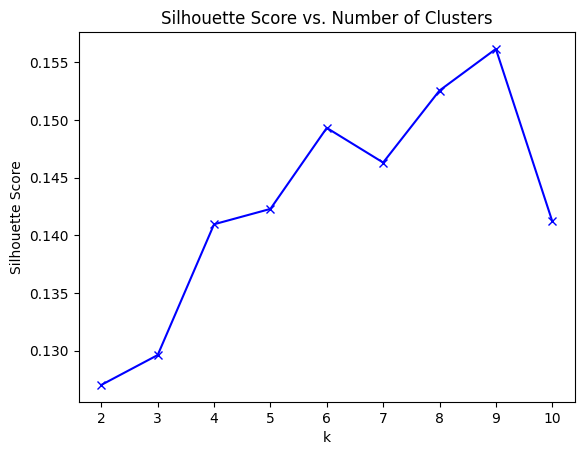

Optimal number of clusters: 9


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine optimal number of clusters using Silhouette Method
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(pca_df, labels))

# Plot Silhouette scores
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Optimal number of clusters
optimal_k = K[sil_scores.index(max(sil_scores))]
print(f'Optimal number of clusters: {optimal_k}')

# Apply KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(pca_df)


### *DBScan*

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Determine optimal parameters for DBSCAN
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(2, 10)
best_sil_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_df)
        if len(set(labels)) > 1:  # Ensure at least 2 clusters
            sil_score = silhouette_score(pca_df, labels)
            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f'Optimal DBSCAN parameters: {best_params}')


In [ ]:
# Apply DBSCAN with optimal parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan.fit_predict(pca_df)


In [ ]:
result_df = pd.DataFrame({
    'id_encounter': data.index,  # Assuming 'id_encounter' is the index or an existing column
    'kmean_label': kmeans_labels,
})

result_df.to_csv('clustering_results.csv', index=False)
